In [1]:
%matplotlib inline
import h5py
import sys
sys.path.append('../../../../hsi/src/python')

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
from skimage.segmentation import mark_boundaries

## Load HDF5

In [2]:
import tables as pt
h5file = pt.open_file('../../data/hiperespectral/pg-PR1B0000-2001022302_022_001.h5', 'a')

### View Node Tree

In [3]:
# List of root nodes for each band range
band_ranges = {
    'VNIR': h5file.root.VNIR, 
    'SWIR': h5file.root.SWIR,
    'TIR': h5file.root.TIR 
}

leaf_list = []
for band_range, group in band_ranges.items():
    print(f'{band_range} arrays:')
    for leaf in group._f_walknodes('Leaf'):
        leaf_list.append(str(leaf))
        print(leaf.__str__()[:-3])

VNIR arrays:
/VNIR/VNIR_Supplement (Array(8802, 58))
/VNIR/VNIR_Swath/Data Fields/ImageData1 (Array(4200, 4980))
/VNIR/VNIR_Swath/Data Fields/ImageData2 (Array(4200, 4980))
/VNIR/VNIR_Swath/Data Fields/ImageData3B (Array(4600, 4980))
/VNIR/VNIR_Swath/Data Fields/ImageData3N (Array(4200, 4980))
/VNIR/VNIR_Swath/Geolocation Fields/Latitude (Array(11, 11))
/VNIR/VNIR_Swath/Geolocation Fields/Longitude (Array(11, 11))
SWIR arrays:
/SWIR/SWIR_Supplement (Array(2512, 49))
/SWIR/SWIR_Swath/Data Fields/ImageData4 (Array(2100, 2490))
/SWIR/SWIR_Swath/Data Fields/ImageData5 (Array(2100, 2490))
/SWIR/SWIR_Swath/Data Fields/ImageData6 (Array(2100, 2490))
/SWIR/SWIR_Swath/Data Fields/ImageData7 (Array(2100, 2490))
/SWIR/SWIR_Swath/Data Fields/ImageData8 (Array(2100, 2490))
/SWIR/SWIR_Swath/Data Fields/ImageData9 (Array(2100, 2490))
/SWIR/SWIR_Swath/Geolocation Fields/Latitude (Array(11, 11))
/SWIR/SWIR_Swath/Geolocation Fields/Longitude (Array(11, 11))
TIR arrays:
/TIR/TIR_Supplement/TIR_Supplement

## Get node information

### Geolocalization nodes

In [4]:
node = h5file.get_node('/TIR/TIR_Swath/Geolocation Fields')
for child in node:
    print(f'{child.name}: {type(child)}')

Latitude: <class 'tables.array.Array'>
Longitude: <class 'tables.array.Array'>


In [5]:
latitude  = node._f_get_child('Latitude')
longitude = node._f_get_child('Longitude')

print(latitude.shape, longitude.shape)

(11, 11) (11, 11)


### Supplement Nodes

In [6]:
node = h5file.get_node('/TIR/TIR_Supplement')
for child in node:
    print(f'{child.name}: {type(child)}')

TIR_Supplement_Chopper: <class 'tables.array.Array'>
TIR_Supplement_Encoder: <class 'tables.array.Array'>
TIR_Supplement_Temp: <class 'tables.array.Array'>


In [7]:
chopper = node._f_get_child('TIR_Supplement_Chopper')
encoder = node._f_get_child('TIR_Supplement_Encoder')
temp    = node._f_get_child('TIR_Supplement_Temp')

print(chopper.shape, encoder.shape, temp.shape)

(70, 100, 10, 8) (70, 935) (70, 13)


### Image Nodes

#### Method 1: Accessing by attribute

(2100, 2490)


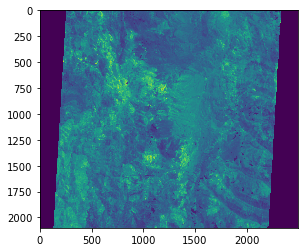

In [8]:
img = h5file.root.SWIR.SWIR_Swath._f_get_child('Data Fields').ImageData4.read()
print(img.shape)
pl.imshow(img)

#### Method 2: Accessing by path in node tree

(2100, 2490)


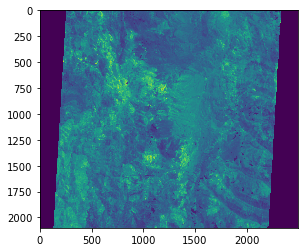

In [9]:
img = h5file.get_node('/SWIR/SWIR_Swath/Data Fields', 'ImageData4').read()
print(img.shape)
pl.imshow(img)

### View all band images

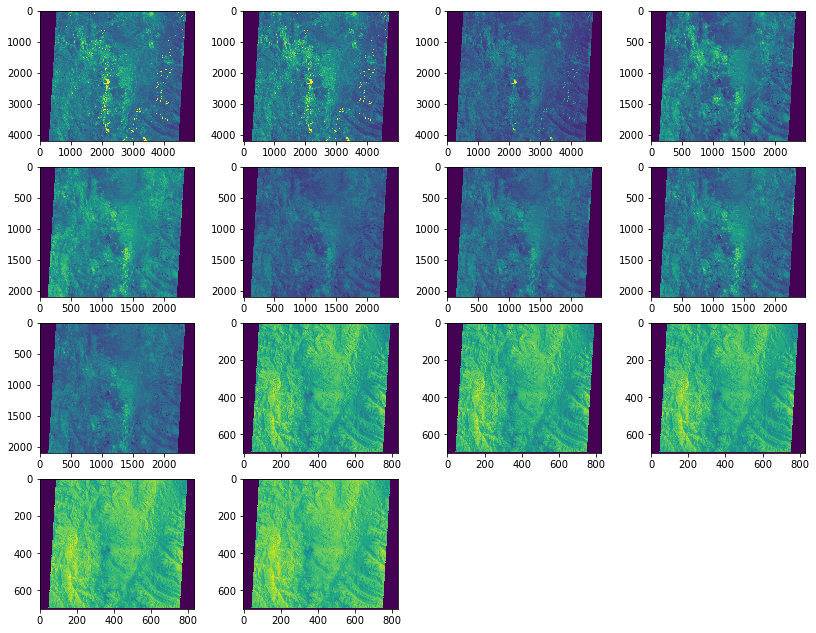

In [10]:
bands = ['VNIR', 'SWIR', 'TIR']
imgs = [['1','2','3N'], ['4','5','6','7','8','9'], ['10','11','12','13','14']]

c = 1
plt.figure(figsize=(14, 11))
for k in range(len(bands)):
    band = bands[k]
    for i in range(len(imgs[k])):
        img_id = imgs[k][i]
        img = h5file.get_node(f'/{band}/{band}_Swath/Data Fields', f'ImageData{img_id}').read()
        plt.subplot(4, 4, c)
        c += 1
        plt.imshow(img)

plt.show()